## **Problem Statement**

### **Business Context**

Medicon is a leading pharmaceutical company and one of the world's largest vaccine manufacturers. During the last quarter, the company clinically tested five batches of the Covid-19 vaccine, and approximately 2,00,000 doses of this vaccine have already been administered to people. The sixth batch (40,000 doses) has now been manufactured and must be tested for quality assurance (whether the dose will be able to do a satisfactory job or not) as well as their time of effect (time taken for the dose to completely cure COVID). From the analysis of the previous batches, it is found that a dose is two times more likely to produce a satisfactory result as compared to an unsatisfactory result.


[**Note**: This is not a clinical trial, the vaccine has already cleared clinical trials. This batch test is to ensure the quality and effectiveness of the sixth batch]

### **Objective**

By analyzing random samples collected from the batch, the company plans to infer the quality (whether a dose will do a satisfactory job or not) and time of effect of this (sixth) batch. As a Data Scientist in Medicon's Quality Assurance team, you've been tasked with inspecting the batch's quality. The objective has been sub-divided further into the following tasks:

**Task 1**: The Quality Assurance team has randomly selected 10 volunteers who were ready for the trial of the new batch and has given one dose to each volunteer. They want to understand the chances of doses being unsatisfactory by plotting the probability distribution of the number of unsatisfactory doses. They also want to find the probability that

A) exactly 3 doses out of 10 will not do a satisfactory job

B) at most 3 doses out of 10 will not do a satisfactory job

C) more than 8 doses out of 10 will do a satisfactory job

**Task 2**: The New York City administration wants to buy 20 doses for healthcare workers who tested positive for COVID. They have contacted the company and requested 20 doses. The Quality Assurance team want to find the probability that

A) at least 11 doses will not do a satisfactory job out of the 20 doses

B) at most 5 doses out of the 20 will not do a satisfactory job

C) at least 13 doses out of the 20 will do a satisfactory job

**Task 3**: The Quality Assurance team wants to analyze the time of effect for doses. So, they have randomly selected 50 volunteers with the help of the city administration and given one dose to each volunteer. The times of effect of these 50 doses are stored in the 'doses.csv' file. Based on the sample data, they want to

A) find the probability that the time of effect of a dose is less than 11.5 hours

B) find the probability that the time of effect of a dose is more than 10 hours

C) calculate the 90th percentile of time of effect for the doses, which will give the value below which lies the time of effect of 90% of the doses

**Note**: Here, satisfactory job means that the dose is able to completely cure covid and it does not have any side effects.

### **Solution Approach**


Let $p$ be the probability that a dose will not do a satisfactory job. It is provided that a dose is two times more likely to produce a satisfactory result as compared to an unsatisfactory result. So, the probability that a dose will do a satisfactory job is $2p$.

According to the rules of probability, the total probability is always 1

$p + 2p = 1$

$=> 3p = 1$

$=> p = 1/3$

$=> p = 0.33$

Hence, the probability of success for each trial is 0.33.

**Note**: In this case, success denotes the event that a dose will not do a satisfactory job.

### **Data**

For the third task, you have been provided the dataset **doses.csv**. The features in the dataset are:

* drug_serial_number: Unique serial number of a dose
* time_of_effect: Time taken for the dose to completely cure COVID (in hours)

## **Let us start by importing the required libraries**

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## **Import the necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## **Task 1**

**The quality assurance team has randomly selected 10 volunteers who were ready for the trial of the new batch and given one dose to each volunteer.**

In the above situation,

*  There are only two possible outcomes (success or failure) for each trial – A dose will do a satisfactory job or not (yes or no).

* Number of trials ($n$) is fixed and finite - A  sample of size 10 is taken. Each dose in the sample represents a trial.

* Each trial is independent of the other trials - It is reasonable to assume that the doses given to each person are independent of each other.

* The probability of success ($p$) is the same for each trial - The probability of success (a dose will not do a satisfactory job) for each trial is calculated to be 0.33

Hence, the number of unsatisfactory doses follows a Binomial distribution with the parameters $n = 10$ and $p = 0.33$

In [3]:
# declare the parameters n and p of the binomial distribution
n = 10
p = 0.33

In [4]:
# store all possible number of unsatisfactory doses in a numpy array
k=np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the mass probabilities for all possible number of unsatisfactory doses
binomial_prob = binom.pmf(k = k,n = n, p = p)

In [6]:
binomial_prob

array([1.82283780e-02, 8.97815635e-02, 1.98993465e-01, 2.61364552e-01,
       2.25280640e-01, 1.33150945e-01, 5.46515074e-02, 1.53816609e-02,
       2.84101573e-03, 3.10956945e-04, 1.53157899e-05])

Let us plot the probability distribution of the number of unsatisfactory doses.

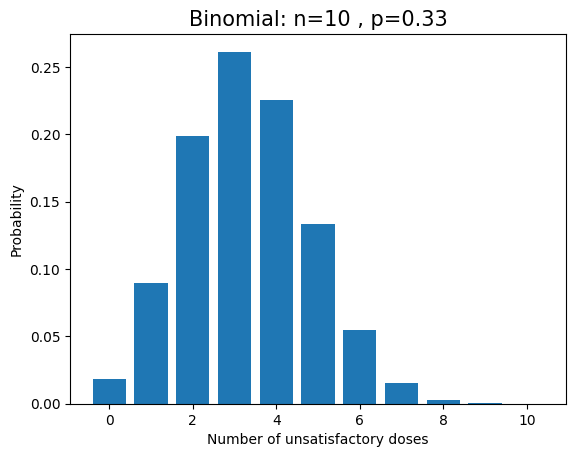

In [7]:
# plot the probability distribution
plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
plt.show()

The above plot visualizes the mass probabilities for the different number of unsatisfactory doses. We can observe that:
- The mass probability that exactly 3 doses will not do a satisfactory job is comparatively higher than all the other mass probabilities.
- The chances are very low that 9 or 10 doses are unsatisfactory.

### **A) Let us find the probability that exactly 3 doses out of 10 will not do a satisfactory job.**

Suppose $X$ is the random variable that denotes the number of unsuccessful doses. We are to calculate the probability $P(X=3)$.

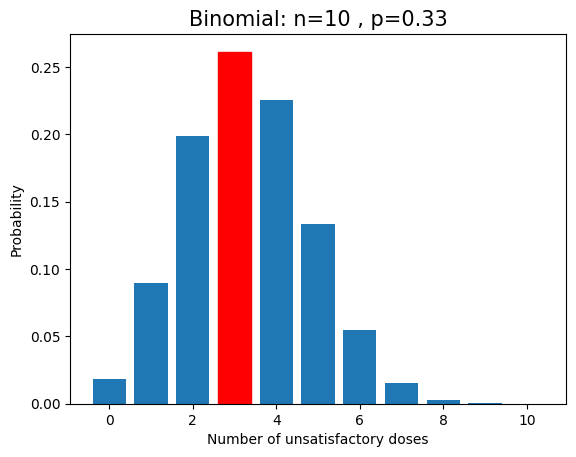

In [8]:
# plot the probability distribution to better visualize the calculations
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
barl[3].set_color('r')
plt.show()

* In the above graph, the red bar represents $P(X=3)$

* Let's calculate the probability that out of 10 randomly selected doses, exactly 3 will not do a satisfactory job.

* We will use `binom.pmf()` for this.
 * The function `binom.pmf(k,n,p)` calculates the probability $P(X=k)$

In [9]:
# calculate P(X=3) using the pmf function
binom.pmf(k=3,n=n,p=p)

0.2613645515525908

The same result can be obtained by selecting the value at index 3 in the binomial probabilities array

In [10]:
binomial_prob[3]

0.2613645515525908

* The probability that exactly 3 doses out of 10 will not do a satisfactory job is 26.14%.

### **B) Let us find the probability that at most 3 doses out of 10 will not do a satisfactory job.**

We have to calculate the probability $P(X<=3)$.

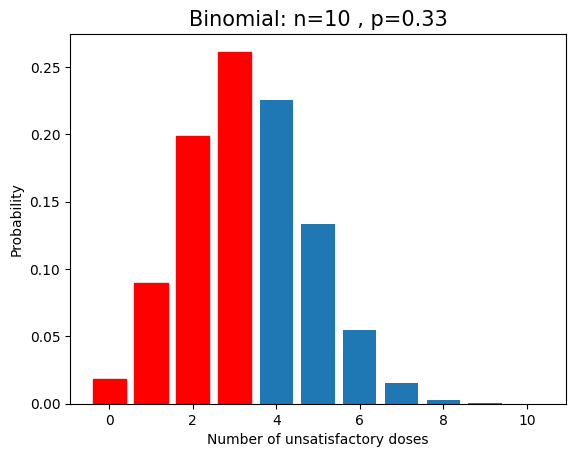

In [11]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,4):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=3)$.

* Let's calculate the probability that out of 10 randomly selected doses, at most 3 will not do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [12]:
# calculate P(x<=3) using the cdf function
prob_atmost3 = binom.cdf(k = 3 ,n = n, p = p)
print(prob_atmost3)

0.5683679584925142


*  56.84% is the probability that at most 3 doses out of 10 will not do a satisfactory job.

### **C) Let us find the probability that more than 8 doses out of 10 will do a satisfactory job.**

* If the number of doses that do a satisfactory job is more than 8, then the number of doses that do an unsatisfactory job are less than 2, i.e., the number of doses that do an unsatisfactory job are at most 1.

* So, we need to compute the probability that at most 1 dose does an unsatisfactory job, i.e., $P(X <= 1)$

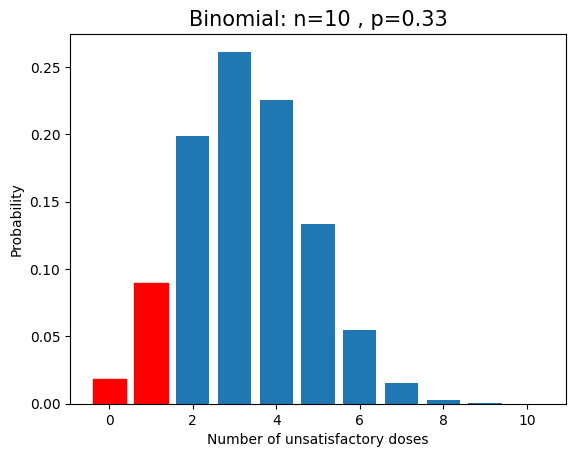

In [13]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(2):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=1)$.

* Let's calculate the probability that out of 10 randomly selected doses, more than 8 will do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [14]:
# calculate the probability P(X<=1) using the cdf function
prob_atmost1 = binom.cdf(k=1, n=n, p=p)
print(prob_atmost1)

0.10800994155329086


*  10.80% is the probability that more than 8 doses out of 10 will do a satisfactory job.

## **Task 2**

**The New York City administration wants to buy 20 doses for healthcare workers who tested positive for COVID. They have contacted the company and requested 20 doses. The Quality Assurance team want to find the probability.**

In the above situation, the number of unsatisfactory doses follows a Binomial distribution with the parameters $n = 20$ and $p = 0.33$

Suppose X is the random variable that denotes the number of unsuccessful doses.

In [15]:
# declare the parameters n and p of the binomial distribution
n = 20
p = 0.33
# store all possible number of unsatisfactory doses in a numpy array
k=np.arange(0,21)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [16]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the mass probabilities for all possible number of unsatisfactory doses
binomial_prob = binom.pmf(k = k,n = n, p = p)

### **A) Find the probability that at least 11 doses will not do a satisfactory job out of the 20 doses.**

We are to calculate the probability $P(X>=11)$. It can be obtained using the `cdf` function

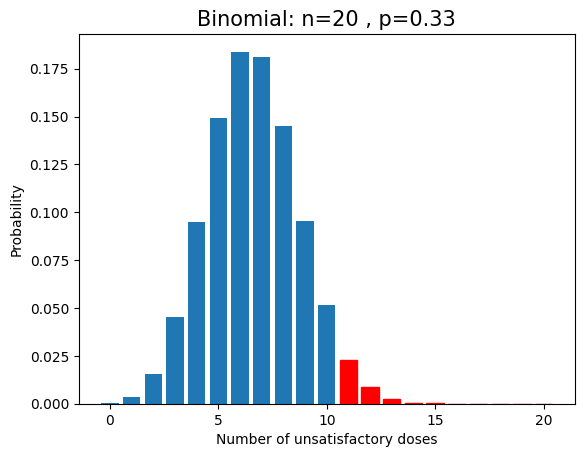

In [17]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(11,21):
    barl[i].set_color('r')
plt.show()

In the above graph, the red region represents $P(X>=11)$. We can simplify the computation as follows:

$P(X>=11)$

$= 1 - P(X<11)$

$= 1 - P(X<=10)$

Now, we can use `binom.cdf()` for calculating the probability that out of 20 randomly selected doses, at least 11 will not do a satisfactory job.

In [18]:
# calculate P(x>=11) using cdf function
prob_atleast11 = 1 - binom.cdf(k = 10, n = n, p = p)
print(prob_atleast11)

0.03499740152648401


* There is 3.5 % chance that at least 11 out of 20 doses will not do a satisfactory job

### **B) Find the probability that at most 5 doses out of the 20 will not do a satisfactory job.**

We have to calculate the probability $P(X<=5)$.

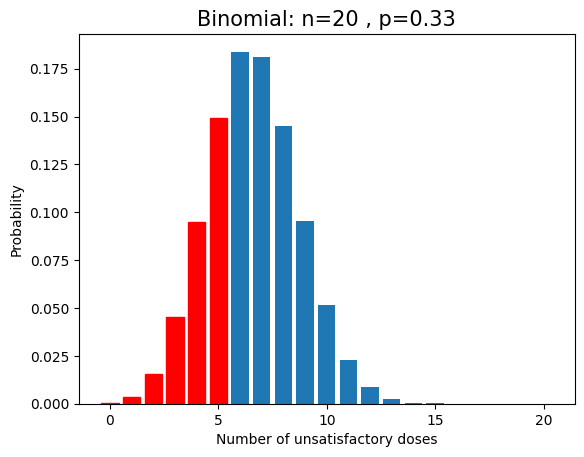

In [19]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,6):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=5)$.

* Let's calculate the probability that out of 20 randomly selected doses, at most 5 will not do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [20]:
# calculate the probability P(X<=5) using the pmf function
prob_atmost5 = binom.cdf(k=5, n=n, p=p)
print(prob_atmost5)

0.30825005639386527


*  30.82% is the probability that at most 5 doses out of 20 will not do a satisfactory job.

### **C) Calculate the probability that at least 13 doses out of the 20 will do a satisfactory job**

* If the number of doses that do a satisfactory job at least 13, then the number of doses that do an unsatisfactory job are at most 7, i.e., the number of doses that do an unsatisfactory job are less than or equal to 7.

* So, we need to compute the probability $P(X <= 7)$


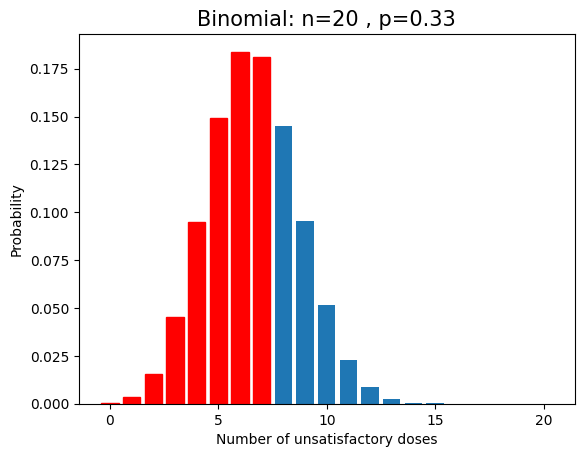

In [21]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,8):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=7)$.

* Let's calculate the probability that out of 20 randomly selected doses, more than 13 will do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [22]:
# calculate the probability P(X<=7) using the cdf function
prob_atmost6 = binom.cdf(k=7, n=n, p=p)
print(prob_atmost6)

0.6732488959678964


*  67.32% is the probability that at least 13 doses out of 20 will do a satisfactory job.

## **Task 3**

The quality assurance team wants to analyze the time of effect for doses. So, they have randomly selected 50 volunteers with the help of the city administration and given one dose to each volunteer. The time of effect of these 50 doses are stored in 'doses.csv' file.

### **Reading the Sample Data into the DataFrame**

In [23]:
# uncomment the below code cell to mount your google drive
#  from google.colab import drive
#  drive.mount('/content/drive')

In [24]:
drug = pd.read_csv('doses.csv')
drug.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


### **Overview of the dataset**

In [25]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


There are no null values in the dataset

### **Mean and standard deviation of the time of effect for the sample doses**

In [26]:
# import the required function
from scipy.stats import norm
# estimate the mean and standard deviation of the time of effect for the doses
mu = drug['time_of_effect'].mean()
sigma = drug['time_of_effect'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


### **Plotting the Distribution**



It will help us analyze the shape of the distribution of time of effect for doses.

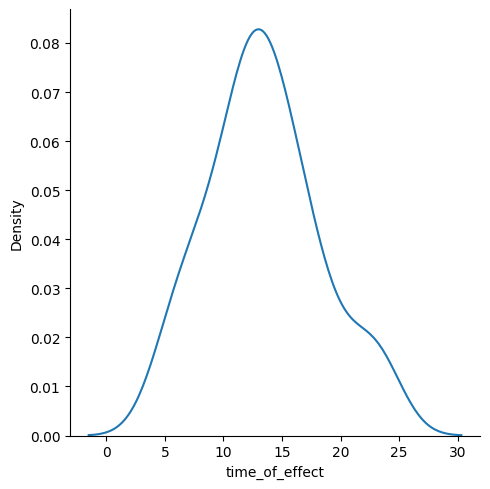

In [27]:
# distribution plot of time of effect
sns.displot(drug['time_of_effect'],kind="kde")
plt.show()

* As you can see in the above plot, the shape of the distribution is not perfectly normal because we just have 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

### **A) Find the probability that the time of effect of a dose is less than 11.5 hours**

* Suppose $X$ is the random variable that denotes the time of effect of a dose. We are to calculate $P(X<11.5)$

* Now, for continuous probability distributions

$$P(X<k) = P(X<=k)$$

* We will use `norm.cdf()` to calculate the cumulative probability
  * The function `norm.cdf(x, mu, sigma)` calculates the probability $P(X<x)$ or $P(X<=x)$

In [28]:
# calculate the probability P(X<11.5) using cdf function
prob = norm.cdf(11.5, mu, sigma)
print('The probability that the time of effect of a dose is less than 11.5 is', round(prob, 4))

The probability that the time of effect of a dose is less than 11.5 is 0.3412


* There is 34.12% chance that the time of effect of a randomly selected dose is less than 11.5 hours

### **B) Find the probability that the time of effect of a dose is more than 10 hours.**


* Suppose $X$ is the random variable that denotes the time of effect of a dose. We are to calculate $P(X>10)$

* Now, for continuous probability distributions

$$P(X<k) = P(X<=k)$$

* We first calculate the probability $P(X<=10)$ using the CDF function `norm.cdf()`. Then, we calculate the probability $P(X>10)$ using the complement rule $(1 - P(X<=10))$

* We will use `norm.cdf()` to calculate the cumulative probability
  * The function `norm.cdf(x, mu, sigma)` calculates the probability $P(X<x)$ or $P(X<=x)$

In [29]:
# calculate the probability P(X>10) using cdf function
prob_lessthan10 = norm.cdf(10., mu, sigma)

prob_morethan10 = 1 - prob_lessthan10
print('The probability that the time of effect of a dose is more than 10 is', round(prob_morethan10, 4))

The probability that the time of effect of a dose is more than 10 is 0.7659


* There is 76.59% chance that the time of effect of a randomly selected dose is more than 10 hours.

### **C) Calculate the 90th percentile of time of effect for the doses**

The `ppf` function is an inverse form of the `cdf` function. Suppose $P(X<=k) = \alpha$, where we are provided the $\alpha$ (probability) value, then we can calculate the value of $k$ using the `ppf` function. This is the Percent Point Function.

In this case, we are to calculate $k$ such that $P(X<=k) = 0.90$. We will use the `ppf()` function for this

* The function `norm.ppf(α, loc, scale)` calculates the value $k$ such that $P(X<=k) = \alpha$

In [30]:
perc_90th = norm.ppf(0.90, mu, sigma)
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2),'hours')

The 90th percentile of the time of effect for doses is 19.52 hours


* The 90th percentile of the time of effect for doses is 19.52 hours

## **Conclusions**

* The binomial distribution plot suggests the following:
  * On an average, 3 out of 10 doses will do an unsatisfactory job
  * Out of 10 doses, the mass probability that exactly 3 doses will not do a satisfactory job is comparatively higher than all the other mass probabilities
  * This shows that if we randomly select 10 doses, there are higher chances of exactly 3 doses not doing a satisfactory job than any other specific number of doses

* Based on the testing done by the QA team, the following points were noticed:
  * The probability that exactly 3 doses out of 10 will not do a satisfactory job is 26.14%
  * There is a 56.84% chance that at most 3 doses out of 10 will not do a satisfactory job
  *  The probability that more than 8 doses out of 10 will do a satisfactory job is 10.80%.

* Based on the testing done by the QA team before sending the requested number of doses to the New York City administration, the following points were noticed:
  * There is a 3.5 % chance that at least 11 out of 20 doses will not do a satisfactory job
    * This suggests that it is very unlikely that more than 50% of the doses will be unsatisfactory
  * There is a 30.82 % chance that at most 5 out of 20 doses will not do a satisfactory job
  * There is a 67.32 % chance that at least 13 out of 20 doses will do a satisfactory job

* Based on the testing done by the QA team to analyze the time of effect for doses, the following points were noticed:
  * There is 34.12% chance that the time of effect of a randomly selected dose is less than 11.5 hours
  * There is 76.59% chance that the time of effect of a randomly selected dose is more than 10 hours.
  * There is a 90% chance that the time of effect for a randomly selected dose is less than 19.52 hours

---